In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
from astropy.coordinates import SkyCoord
import astropy.units as u

In [3]:
filepath = '/home/alice/euler_results/results_all_snr7_4yrs_no_pre_excl'
psd_iter = []
with h5py.File(filepath, "r") as f:
        print(f.keys())
        for key, val in f.attrs.items():
                print(f"  {key}: {val}")
                
        T_obs = f.attrs['T_obs']/365/24/3600
        snr_thr = f.attrs['snr_threshold']
        positions = f['position'][:]
        snrs = f['snr'][:]
        f0 = f['f0'][:]
        for i in f['psd_total_iter'].keys():
                psd_iter.append((i, f['psd_total_iter'][i]['psd_total'][:]))
        global_fr = f['global_fr'][:]

<KeysViewHDF5 ['f0', 'global_fr', 'position', 'psd_total_iter', 'snr']>
  T_obs: 126144000.0
  n_resolved: 5107
  n_total: 15539324
  snr_threshold: 7.0


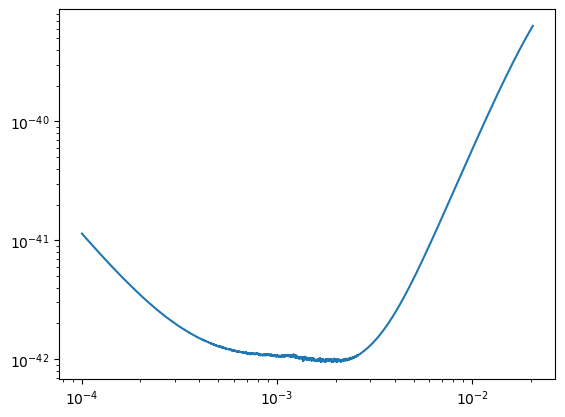

In [4]:
plt.loglog(global_fr, psd_iter[0][-1])

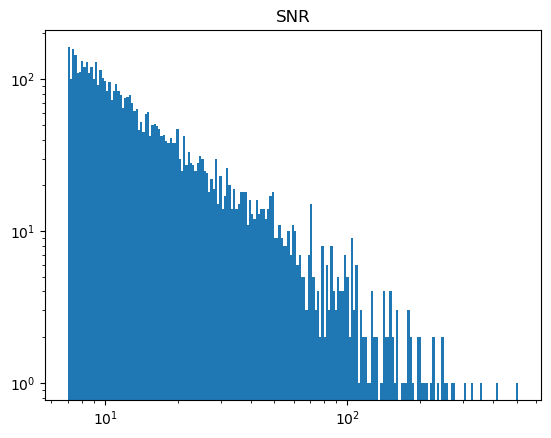

In [5]:
bins = np.logspace(np.log10(snrs.min()), np.log10(snrs.max()), 200)
plt.figure()
plt.hist(snrs, bins = bins)
plt.title("SNR")
plt.yscale('log')
plt.xscale('log')
plt.show()

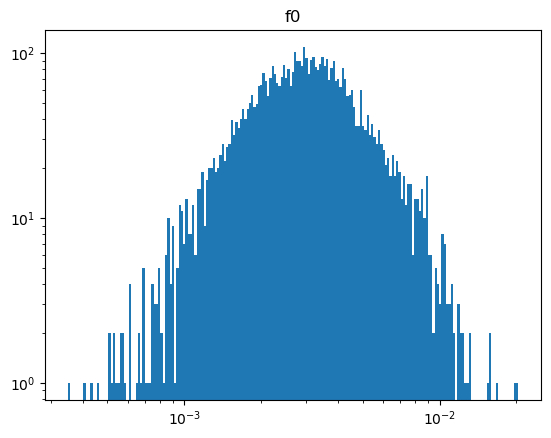

In [6]:
bins = np.logspace(np.log10(f0.min()), np.log10(f0.max()), 200)
plt.figure()
plt.hist(f0, bins = bins)
plt.title("f0")
plt.yscale('log')
plt.xscale('log')
plt.show()

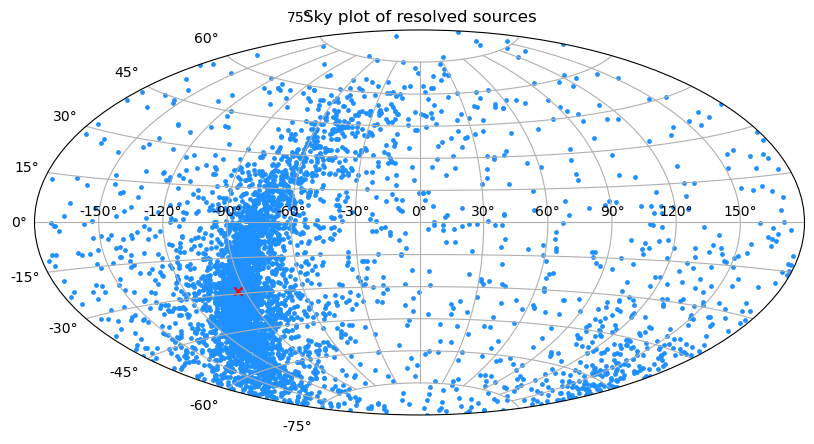

In [7]:
lon_list = []
lat_list = []

for group in positions:
    lat_list.append(group[0])
    lon_list.append(group[1])

lon_array = np.array(lon_list)
lat_array = np.array(lat_list)

coords = SkyCoord(lon=lon_array*u.rad, lat=lat_array*u.rad, frame='barycentrictrueecliptic')

eq_coords = coords.transform_to('icrs')
ra = eq_coords.ra.wrap_at(180*u.degree).radian  
dec = eq_coords.dec.radian

# Galactic center
gc = SkyCoord(l=0*u.degree, b=0*u.degree, frame='galactic')
gc_eq = gc.transform_to('icrs')
ra_gc = gc_eq.ra.wrap_at(180*u.degree).radian
dec_gc = gc_eq.dec.radian

plt.figure(figsize=(10,5))
plt.subplot(111, projection='aitoff')
plt.grid(True)
plt.scatter(ra, dec, s=6, color='dodgerblue')
plt.scatter(ra_gc, dec_gc, marker='x',  color='red')
plt.title("Sky plot of resolved sources")
#plt.legend()
plt.show()

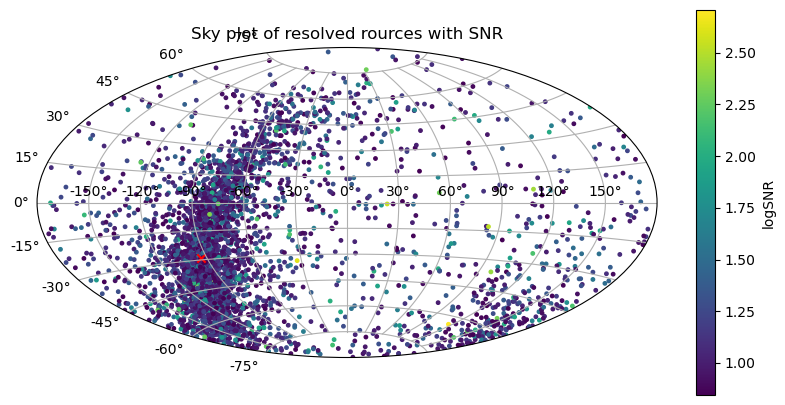

In [8]:
log_snrs = np.log10(snrs)
plt.figure(figsize=(10,5))
plt.subplot(111, projection='aitoff')
plt.grid(True)
sc = plt.scatter(ra, dec, c=log_snrs, cmap='viridis', s=6)
plt.colorbar(sc, label='logSNR') 
plt.scatter(ra_gc, dec_gc, marker='x',  color='red')
plt.title("Sky plot of resolved rources with SNR")
#plt.legend()
plt.show()